### Treść zadania

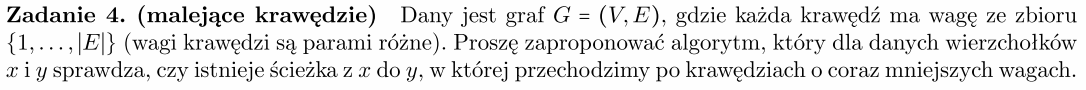

### Omówienie algorytmu

Ponieważ wybór ścieżki zależy od wyboru poprzedniej krawędzi, tzn. z punktu widzenia wierzchołka, w którym się w danym momencie znajdujemy, nasz kolejny wybór jest uzależniony od tego, krawędzią o jakiej wartości do niego dotarliśmy, nie możemy zapamiętywać odwiedzonych wierzchołków, ponieważ dany wierzchołek możemy odwiedzić wielokrotnie, jednakże wchodząc do niego inną krawędzią. Oczywiście, jeżeli z danego wierzchołka byliśmy w stanie wyjść pewnymi krawędziami, które z niego wychodzą, możemy zaznaczyć te krawędzie, którymi udało nam się wyjść, jako odwiedzone i już ich nigdy więcej nie sprawdzać. Wynika to stąd, że już w kolejnym wierzchołku, w którym się znajdziemy, nie obchodzi nas to, jaka była wcześniejsza wartość tej krawędzi, którą dostaliśmy się do rodzica bieżącego wierzchołka, a jedynie wartość ostatniej krawędzi, którą bezpośrednio dotarliśmy do wierzchołka, w którym się znajdujemy w danym momencie. W skrócie: zapamiętujemy krawędzie, po których udało nam się przejść i już więcej po nich nie przechodzimy.
###### UWAGA:
Ponieważ nie jest powiedziane, że graf jest multigrafem (tzn., że dopuszczalne jest istnienie krawędzi wielokrotnych), zakładam, że graf jest grafem prostym, w którym nie ma ani pętli, ani krawędzi wielokrotnych.
###### UWAGA:
Ponieważ wagi są ze zbioru $ \{ 1, ..., |E| \} $, możemy wykorzystać reprezentację macierzową grafu po to, aby móc w miejscu modyfikować macierz, a następnie przywrócić ją do pierwotnego stanu. Najłatwiej będzie oznaczyć krawędź jako odwiedzoną, zamieniając jej wagę na liczbę przeciwną.

### Złożoność

##### Dla reprezentacji listowej grafu (nie będziemy jej używać):
Z tego względu, że zapamiętujemy wszystkie krawędzie, które odwiedziliśmy, musimy utworzyć tablicę kwadratową o rozmiarach $ V \times V $, ponieważ w ten sposób możemy najłatwej zaznaczyć odwiedzone krawędzie pomiędzy dowolną parą wierzchołków. Samo zaalokowanie pamięci na tę tablicę zajmuje już czas $ O(V^2) $, więc nawet, jeżeli liczba krawędzi jest niewielka, złożoność wyniesie zawsze $ O(V^2) $.
###### Obliczeniowa:
$ O(V^2) $
###### Pamięciowa:
$ O(V^2) $
##### Dla reprezentacji macierzowej grafu (lepsza, bo znacznie mniej pamięci):
###### Obliczeniowa:
$ O(V^2) $
###### Pamięciowa:
$ O(1) $ - ponieważ graf otrzymujemy na wejściu w postaci macierzy adjacencji, nie musimy alokować dodatkowego miejsca

### Implementacja #1
#### Dla macierzowej reprezentacji grafu
##### (Dla grafu nieskierowanego)

In [1]:
def is_path(G: 'undirected graph represented by adjacency matrix', x: 'source', y: 'target'):
    n = len(G)
    
    def dfs(u, weight):
        # Return True if visited the target
        if u == y: return True
        for v in range(n):
            # If there is an edge (G[u][v] != 0) and it hasn't been
            # visited yet (G[u][v] > 0) and its weight is smaller than the
            # previous one, visit the next vertex going through this edge
            if 0 < G[u][v] < weight:
                w = G[u][v]
                G[u][v] = G[v][u] = -G[u][v]  # Mark as visited
                if dfs(v, w): return True  # Return True if a path was found
        return False
        
    res = False
    # Start a DFS from each vertex we can visit from the source
    for v in range(n):
        if G[x][v] > 0:  # If there is an unvisited edge
            w = G[x][v]
            G[x][v] = G[v][x] = -G[x][v]  # Mark as visited
            # If found a path, break the loop and store the result
            if dfs(v, w):
                res = True
                break
    
    # Fix a matrix (restore original values)
    for u in range(n):
        for v in range(n):
            G[u][v] = abs(G[u][v])
            
    return res


def undirected_graph_matrix(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for edge in E:
        G[edge[0]][edge[1]] = edge[2]  # edge[2] is weight
        G[edge[1]][edge[0]] = edge[2]
    return G

###### Kilka testów

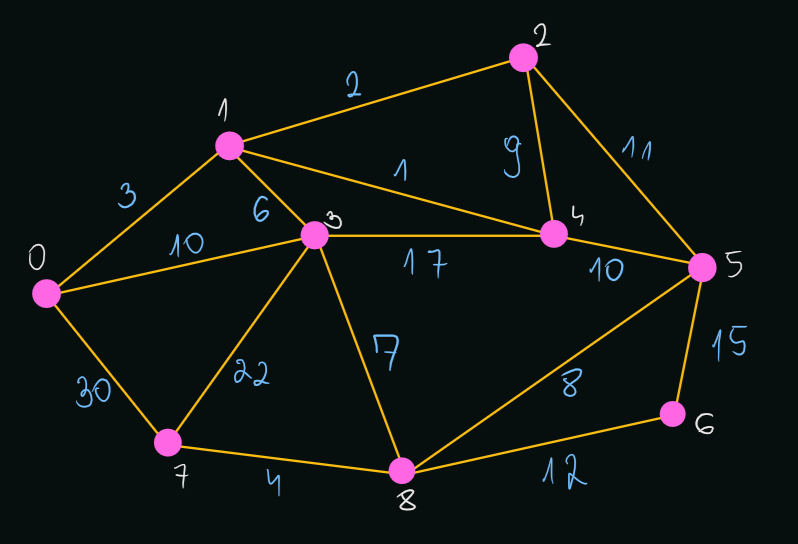

In [2]:
E = [(0, 1, 3), (1, 2, 2), (2, 5, 11), (5, 6, 15), (6, 8, 12), (7, 8, 4), (0, 7, 30), (0, 3, 10),
     (1, 3, 6), (1, 4, 1), (3, 4, 17), (2, 4, 9), (4, 5, 10), (7, 3, 22), (3, 8, 7), (8, 5, 8)]
G = undirected_graph_matrix(E)

In [3]:
is_path(G, 0, 6)

False

In [4]:
is_path(G, 0, 5)

True

### Implementacja #2
#### Dla macierzowej reprezentacji grafu
##### (Dla grafu skierowanego)

Różnica w kodzie jest nieznaczna i jedynie dotyczy tego, że teraz nie zapisujemy już odwiedzonych krawędzi w ten sposób:

    G[u][v] = G[v][u] = -G[u][v]

Ale zapisujemy w taki sposób (bo krawędzie są skierowane):

    G[u][v] *= -1

In [5]:
def is_path(G: 'directed graph represented by adjacency matrix', x: 'source', y: 'target'):
    n = len(G)
    
    def dfs(u, weight):
        # Return True if visited the target
        if u == y: return True
        for v in range(n):
            # If there is an edge (G[u][v] != 0) and it hasn't been
            # visited yet (G[u][v] > 0) and its weight is smaller than the
            # previous one, visit the next vertex going through this edge
            if 0 < G[u][v] < weight:
                w = G[u][v]
                G[u][v] *= -1  # Mark as visited
                if dfs(v, w): return True  # Return True if a path was found
        return False
        
    res = False
    # Start a DFS from each vertex we can visit from the source
    for v in range(n):
        if G[x][v] > 0:  # If there is an unvisited edge
            w = G[x][v]
            G[x][v] *= -1  # Mark as visited
            # If found a path, break the loop and store the result
            if dfs(v, w):
                res = True
                break
    
    # Fix a matrix (restore original values)
    for u in range(n):
        for v in range(n):
            G[u][v] = abs(G[u][v])
            
    return res


def directed_graph_matrix(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for edge in E:
        G[edge[0]][edge[1]] = edge[2]  # edge[2] is weight
    return G

###### Kilka testów

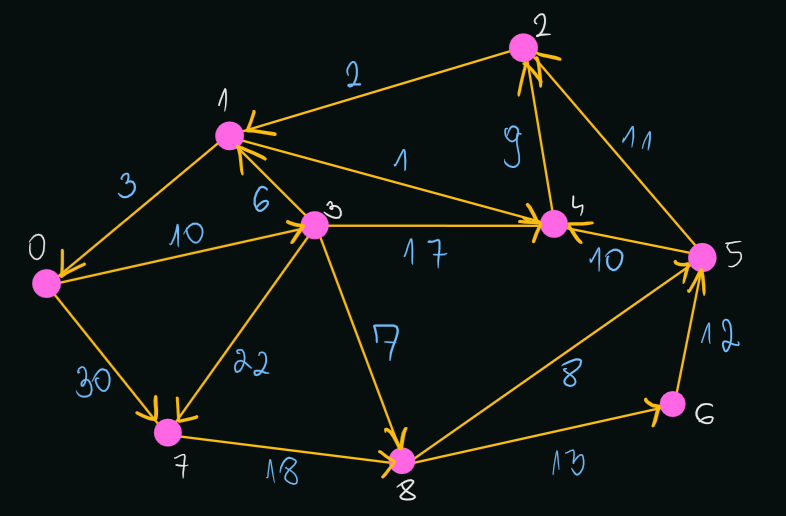

In [6]:
E = [(1, 0, 3), (3, 1, 6), (0, 3, 10), (0, 7, 30), (3, 7, 22), (7, 8, 18), (3, 8, 7), (8, 6, 13),
     (6, 5, 12), (8, 5, 8), (5, 4, 10), (5, 2, 11), (2, 1, 2), (3, 1, 6), (3, 4, 17), (4, 2, 9), 
     (1, 4, 1)]
G = directed_graph_matrix(E)
print(*(' '.join(map(lambda v: str(v).ljust(2), row)) for row in G), sep='\n')

0  0  0  10 0  0  0  30 0 
3  0  0  0  1  0  0  0  0 
0  2  0  0  0  0  0  0  0 
0  6  0  0  17 0  0  22 7 
0  0  9  0  0  0  0  0  0 
0  0  11 0  10 0  0  0  0 
0  0  0  0  0  12 0  0  0 
0  0  0  0  0  0  0  0  18
0  0  0  0  0  8  13 0  0 


In [7]:
is_path(G, 0, 0)

True

In [8]:
is_path(G, 0, 1)

True

In [9]:
is_path(G, 1, 8)

False

# (Dodatkowo) Odtwarzanie ścieżki

### Implementacja #1
#### Dla macierzowej reprezentacji grafu
##### (Dla grafu skierowanego)

In [10]:
def find_path(G: 'undirected graph represented by adjacency matrix', x: 'source', y: 'target'):
    n = len(G)
    parents = [-1] * n
    
    def dfs(u, weight):
        # Return True if visited the target
        if u == y: return True
        for v in range(n):
            # If there is an edge (G[u][v] != 0) and it hasn't been
            # visited yet (G[u][v] > 0) and its weight is smaller than the
            # previous one, visit the next vertex going through this edge
            if 0 < G[u][v] < weight:
                w = G[u][v]
                # Always modify this value even if there was another parent
                # (as we entered a vertex again because there was no path from
                # source to target before, so we can overwrite previous values)
                parents[v] = u  
                G[u][v] = G[v][u] = -G[u][v]  # Mark as visited
                if dfs(v, w): return True  # Return True if a path was found
        return False
        
    found = False
    # Start a DFS from each vertex we can visit from the source
    for v in range(n):
        if G[x][v] > 0:  # If there is an unvisited edge
            parents[v] = x
            w = G[x][v]
            G[x][v] = G[v][x] = -G[x][v]  # Mark as visited
            # If found a path, break the loop and store the result
            if dfs(v, w):
                found = True
                break
    
    # Fix a matrix (restore original values)
    for u in range(n):
        for v in range(n):
            G[u][v] = abs(G[u][v])
            
#     print(parents)
    # Restore path
    return restore_path(parents, x, y) if found else None


def restore_path(parents, source, target):
    path = [target]
    u = target
    while u != source:
        u = parents[u]
        path.append(u)
    return path[::-1]  # Reverse to get the right order


def undirected_graph_matrix(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for edge in E:
        G[edge[0]][edge[1]] = edge[2]  # edge[2] is weight
        G[edge[1]][edge[0]] = edge[2]
    return G

###### Kilka testów

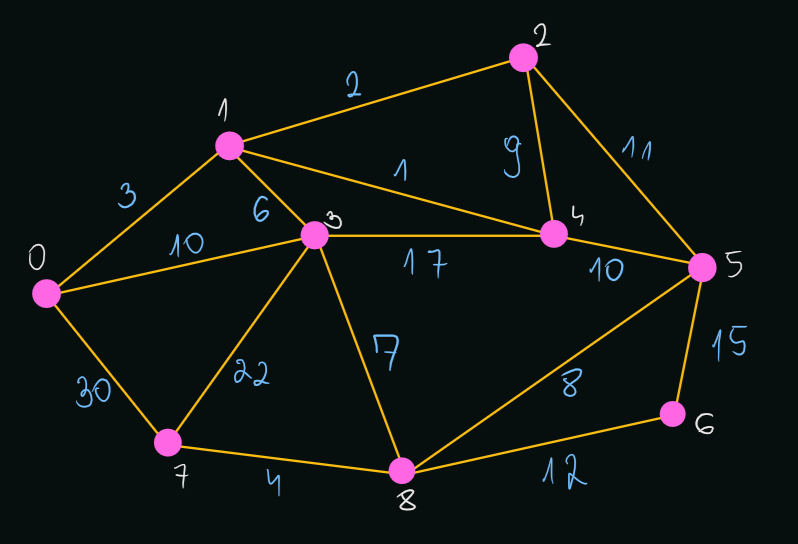

In [11]:
E = [(0, 1, 3), (1, 2, 2), (2, 5, 11), (5, 6, 15), (6, 8, 12), (7, 8, 4), (0, 7, 30), (0, 3, 10),
     (1, 3, 6), (1, 4, 1), (3, 4, 17), (2, 4, 9), (4, 5, 10), (7, 3, 22), (3, 8, 7), (8, 5, 8)]
G = undirected_graph_matrix(E)

In [12]:
print(find_path(G, 0, 6))

None


In [13]:
print(find_path(G, 0, 5))

[0, 7, 3, 4, 5]


### Implementacja #2
#### Dla macierzowej reprezentacji grafu
##### (Dla grafu skierowanego)

In [14]:
def find_path(G: 'undirected graph represented by adjacency matrix', x: 'source', y: 'target'):
    n = len(G)
    parents = [-1] * n
    
    def dfs(u, weight):
        # Return True if visited the target
        if u == y: return True
        for v in range(n):
            # If there is an edge (G[u][v] != 0) and it hasn't been
            # visited yet (G[u][v] > 0) and its weight is smaller than the
            # previous one, visit the next vertex going through this edge
            if 0 < G[u][v] < weight:
                w = G[u][v]
                # Always modify this value even if there was another parent
                # (as we entered a vertex again because there was no path from
                # source to target before, so we can overwrite previous values)
                parents[v] = u  
                G[u][v] *= -1 # Mark as visited
                if dfs(v, w): return True  # Return True if a path was found
        return False
        
    found = False
    # Start a DFS from each vertex we can visit from the source
    for v in range(n):
        if G[x][v] > 0:  # If there is an unvisited edge
            parents[v] = x
            w = G[x][v]
            G[x][v] *= -1  # Mark as visited
            # If found a path, break the loop and store the result
            if dfs(v, w):
                found = True
                break
    
    # Fix a matrix (restore original values)
    for u in range(n):
        for v in range(n):
            G[u][v] = abs(G[u][v])
            
    # Restore path
    return restore_path(parents, x, y) if found else None


def restore_path(parents, source, target):
    path = [target]
    u = target
    while u != source:
        u = parents[u]
        path.append(u)
    return path[::-1]  # Reverse to get the right order


def directed_graph_matrix(E: 'array of edges'):
    # Calculate a number of vertices
    n = 0
    for edge in E:
        n = max(n, edge[0], edge[1])
    n += 1
    # Create a graph matrix
    G = [[0] * n for _ in range(n)]  # 0 means no edge
    for edge in E:
        G[edge[0]][edge[1]] = edge[2]  # edge[2] is weight
    return G

###### Kilka testów

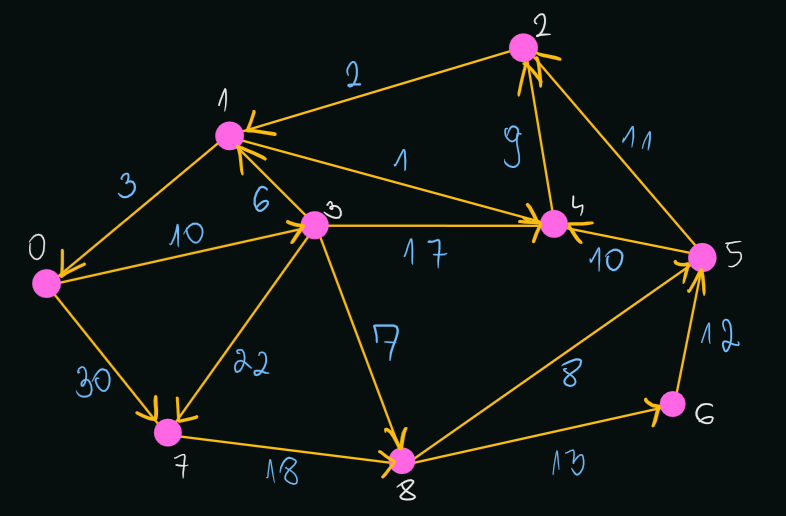

In [15]:
E = [(1, 0, 3), (3, 1, 6), (0, 3, 10), (0, 7, 30), (3, 7, 22), (7, 8, 18), (3, 8, 7), (8, 6, 13),
     (6, 5, 12), (8, 5, 8), (5, 4, 10), (5, 2, 11), (2, 1, 2), (3, 1, 6), (3, 4, 17), (4, 2, 9), 
     (1, 4, 1)]
G = directed_graph_matrix(E)
print(*(' '.join(map(lambda v: str(v).ljust(2), row)) for row in G), sep='\n')

0  0  0  10 0  0  0  30 0 
3  0  0  0  1  0  0  0  0 
0  2  0  0  0  0  0  0  0 
0  6  0  0  17 0  0  22 7 
0  0  9  0  0  0  0  0  0 
0  0  11 0  10 0  0  0  0 
0  0  0  0  0  12 0  0  0 
0  0  0  0  0  0  0  0  18
0  0  0  0  0  8  13 0  0 


In [16]:
print(find_path(G, 0, 0))

[0]


In [17]:
print(find_path(G, 0, 1))

[0, 3, 1]


In [18]:
print(find_path(G, 1, 8))

None


In [19]:
print(find_path(G, 0, 2))

[0, 7, 8, 6, 5, 2]
